#BTC-USD

##7:2:1

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [32]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/BTC-USD.csv')

In [33]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [34]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [35]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.2)
validate_size = len(scaled_prices) - train_size - test_size
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [36]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [37]:
# Tạo mô hình DNN
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/10
51/51 [==============================] - 2s 13ms/step - loss: 0.0124
Epoch 2/10
51/51 [==============================] - 1s 12ms/step - loss: 8.3986e-04
Epoch 3/10
51/51 [==============================] - 1s 13ms/step - loss: 5.8207e-04
Epoch 4/10
51/51 [==============================] - 1s 13ms/step - loss: 5.0594e-04
Epoch 5/10
51/51 [==============================] - 1s 16ms/step - loss: 4.7956e-04
Epoch 6/10
51/51 [==============================] - 1s 16ms/step - loss: 4.9924e-04
Epoch 7/10
51/51 [==============================] - 1s 13ms/step - loss: 4.5904e-04
Epoch 8/10
51/51 [==============================] - 1s 12ms/step - loss: 4.3649e-04
Epoch 9/10
51/51 [==============================] - 1s 13ms/step - loss: 4.6566e-04
Epoch 10/10
14/14 [==============================] - 0s 5ms/step - loss: 0.0012
Loss trên tập kiểm tra: 0.0012033832026645541


7/7 [==============================] - 0s 4ms/step


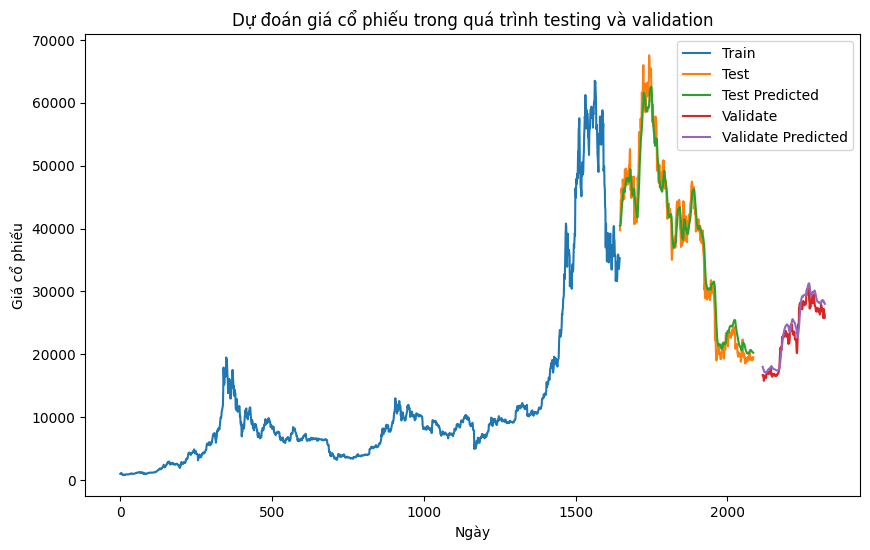

In [39]:
# Dự đoán giá của quá trình testing
X_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(X_test_pred)

# Dự đoán giá của quá trình validation
X_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(X_validate_pred)

# Hiển thị biểu đồ dự đoán giá của quá trình testing và validation
plt.figure(figsize=(10, 6))
train = prices[:train_size]
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(y_test)), scaler.inverse_transform(y_test), label='Test')
plt.plot(range(train_size, train_size + len(y_test)), y_test_pred, label='Test Predicted')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), scaler.inverse_transform(y_validate), label='Validate')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), y_validate_pred, label='Validate Predicted')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Dự đoán giá cổ phiếu trong quá trình testing và validation')
plt.legend()
plt.show()



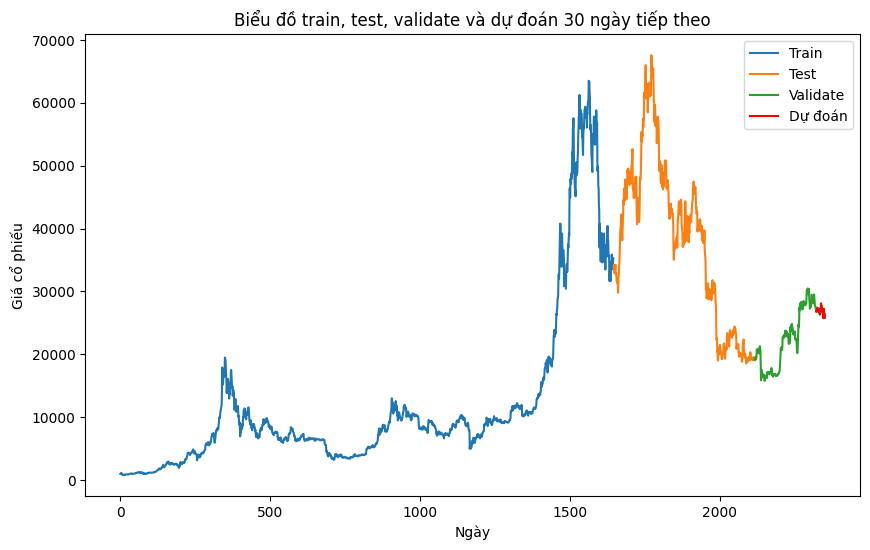

In [40]:
import matplotlib.pyplot as plt

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [41]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
2322    26804.990234
2323    26784.078125
2324    26930.638672
2325    27192.693359
2326    27036.650391
2327    27398.802734
2328    26832.208984
2329    26890.128906
2330    27129.585938
2331    26753.826172
2332    26851.277344
2333    27225.726562
2334    26334.818359
2335    26476.207031
2336    26719.291016
2337    26868.353516
2338    28085.646484
2339    27745.884766
2340    27702.349609
2341    27219.658203
2342    26819.972656
2343    27249.589844
2344    27075.128906
2345    27119.066406
2346    25760.097656
2347    27238.783203
2348    26345.998047
2349    26508.216797
2350    26480.375000
2351    25851.240234
Name: Close, dtype: float64


In [42]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

print("MAE (testing):", mae_test)
print("MAPE (testing):", mape_test)
print("RMSE (testing):", rmse_test)
print("MAE (validation):", mae_validate)
print("MAPE (validation):", mape_validate)
print("RMSE (validation):", rmse_validate)


7/7 [==============================] - 0s 4ms/step
MAE (testing): 1817.684765625
MAPE (testing): 0.05222325234818646
RMSE (testing): 2316.9004877766774
MAE (validation): 1208.0363366580705
MAPE (validation): 0.05225342145009141
RMSE (validation): 1417.411010159285


##5:3:2

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [44]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/BTC-USD.csv')

In [45]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [46]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [47]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.5)
test_size = int(len(scaled_prices) * 0.3)
validate_size = len(scaled_prices) - train_size - test_size
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [48]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [49]:
# Tạo mô hình DNN
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/10
36/36 [==============================] - 2s 12ms/step - loss: 0.0034
Epoch 2/10
36/36 [==============================] - 0s 12ms/step - loss: 1.9937e-04
Epoch 3/10
36/36 [==============================] - 0s 13ms/step - loss: 1.3637e-04
Epoch 4/10
36/36 [==============================] - 0s 12ms/step - loss: 1.2118e-04
Epoch 5/10
36/36 [==============================] - 1s 22ms/step - loss: 1.1978e-04
Epoch 6/10
36/36 [==============================] - 0s 12ms/step - loss: 1.1060e-04
Epoch 7/10
36/36 [==============================] - 0s 12ms/step - loss: 1.0514e-04
Epoch 8/10
36/36 [==============================] - 0s 12ms/step - loss: 1.0256e-04
Epoch 9/10
36/36 [==============================] - 1s 17ms/step - loss: 1.0044e-04
Epoch 10/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0019
Loss trên tập kiểm tra: 0.0018578179879114032


14/14 [==============================] - 0s 4ms/step


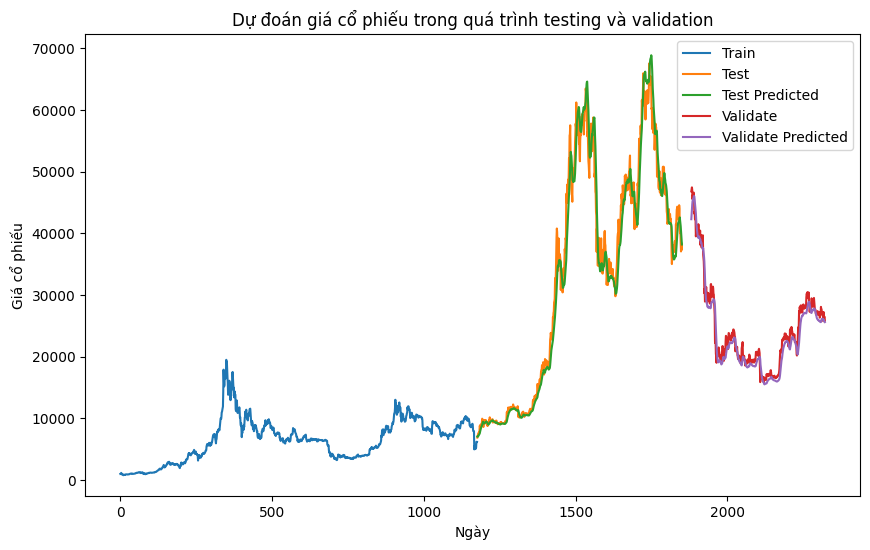

In [51]:
# Dự đoán giá của quá trình testing
X_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(X_test_pred)

# Dự đoán giá của quá trình validation
X_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(X_validate_pred)

# Hiển thị biểu đồ dự đoán giá của quá trình testing và validation
plt.figure(figsize=(10, 6))
train = prices[:train_size]
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(y_test)), scaler.inverse_transform(y_test), label='Test')
plt.plot(range(train_size, train_size + len(y_test)), y_test_pred, label='Test Predicted')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), scaler.inverse_transform(y_validate), label='Validate')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), y_validate_pred, label='Validate Predicted')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Dự đoán giá cổ phiếu trong quá trình testing và validation')
plt.legend()
plt.show()



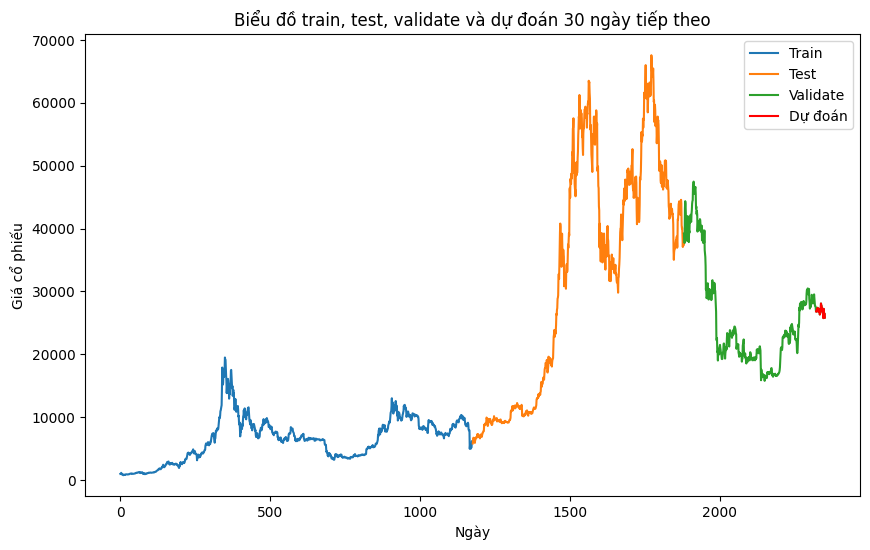

In [52]:
import matplotlib.pyplot as plt

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [53]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
2322    26804.990234
2323    26784.078125
2324    26930.638672
2325    27192.693359
2326    27036.650391
2327    27398.802734
2328    26832.208984
2329    26890.128906
2330    27129.585938
2331    26753.826172
2332    26851.277344
2333    27225.726562
2334    26334.818359
2335    26476.207031
2336    26719.291016
2337    26868.353516
2338    28085.646484
2339    27745.884766
2340    27702.349609
2341    27219.658203
2342    26819.972656
2343    27249.589844
2344    27075.128906
2345    27119.066406
2346    25760.097656
2347    27238.783203
2348    26345.998047
2349    26508.216797
2350    26480.375000
2351    25851.240234
Name: Close, dtype: float64


In [54]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

print("MAE (testing):", mae_test)
print("MAPE (testing):", mape_test)
print("RMSE (testing):", rmse_test)
print("MAE (validation):", mae_validate)
print("MAPE (validation):", mape_validate)
print("RMSE (validation):", rmse_validate)


14/14 [==============================] - 0s 5ms/step
MAE (testing): 2003.8369017650464
MAPE (testing): 0.0552335006551644
RMSE (testing): 2878.770291320899
MAE (validation): 1211.4031210140306
MAPE (validation): 0.050039054992665234
RMSE (validation): 1543.798249033386


#DOGE-USD

##7:2:1

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [56]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/DOGE-USD.csv')

In [57]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [58]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [59]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.2)
validate_size = len(scaled_prices) - train_size - test_size
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [60]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [61]:
# Tạo mô hình DNN
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/10
44/44 [==============================] - 2s 13ms/step - loss: 0.0108
Epoch 2/10
44/44 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 3/10
44/44 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 4/10
44/44 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 5/10
44/44 [==============================] - 1s 13ms/step - loss: 0.0010
Epoch 6/10
44/44 [==============================] - 1s 13ms/step - loss: 9.4562e-04
Epoch 7/10
44/44 [==============================] - 1s 13ms/step - loss: 8.8337e-04
Epoch 8/10
44/44 [==============================] - 1s 13ms/step - loss: 8.1242e-04
Epoch 9/10
44/44 [==============================] - 1s 13ms/step - loss: 7.7489e-04
Epoch 10/10
12/12 [==============================] - 0s 5ms/step - loss: 2.8048e-04
Loss trên tập kiểm tra: 0.00028048496460542083


6/6 [==============================] - 0s 4ms/step


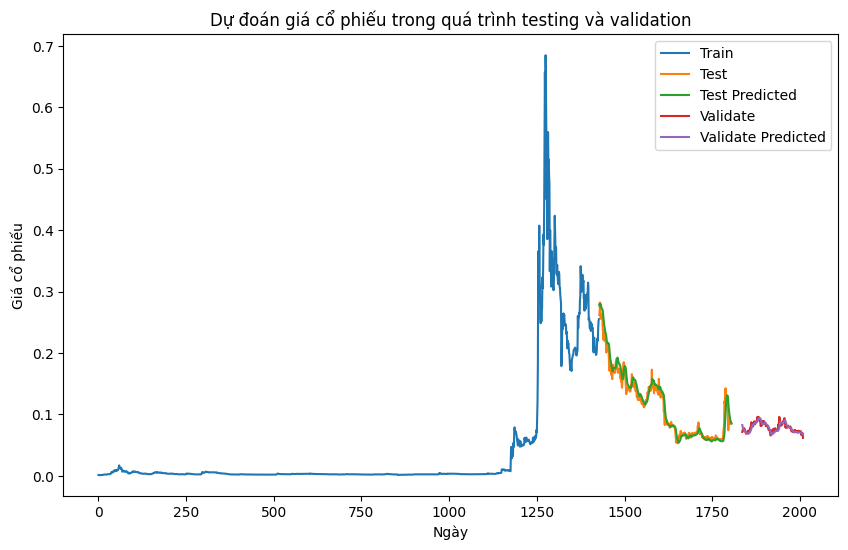

In [63]:
# Dự đoán giá của quá trình testing
X_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(X_test_pred)

# Dự đoán giá của quá trình validation
X_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(X_validate_pred)

# Hiển thị biểu đồ dự đoán giá của quá trình testing và validation
plt.figure(figsize=(10, 6))
train = prices[:train_size]
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(y_test)), scaler.inverse_transform(y_test), label='Test')
plt.plot(range(train_size, train_size + len(y_test)), y_test_pred, label='Test Predicted')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), scaler.inverse_transform(y_validate), label='Validate')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), y_validate_pred, label='Validate Predicted')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Dự đoán giá cổ phiếu trong quá trình testing và validation')
plt.legend()
plt.show()



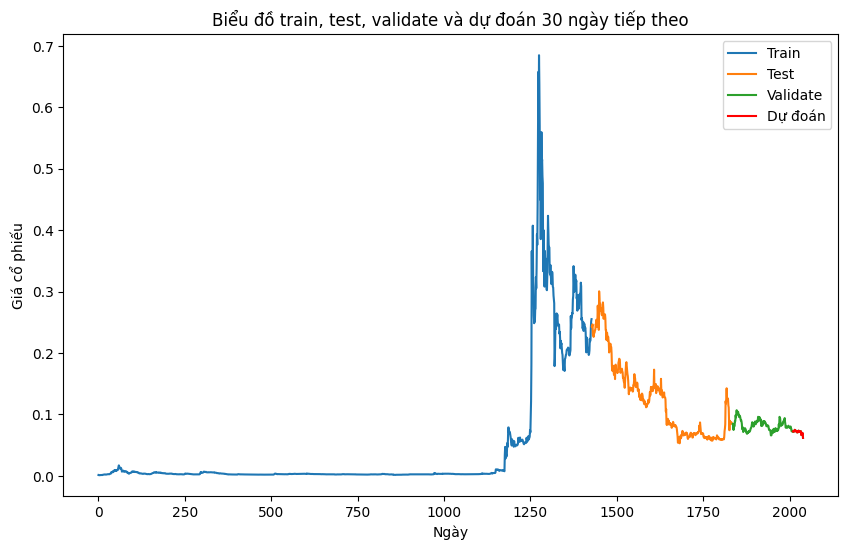

In [64]:
import matplotlib.pyplot as plt

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [65]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
2010    0.072459
2011    0.071777
2012    0.071986
2013    0.072046
2014    0.072729
2015    0.074911
2016    0.073546
2017    0.073527
2018    0.073670
2019    0.072142
2020    0.072998
2021    0.072864
2022    0.070735
2023    0.070875
2024    0.070984
2025    0.072683
2026    0.073613
2027    0.073185
2028    0.072361
2029    0.071660
2030    0.071492
2031    0.072612
2032    0.072671
2033    0.072471
2034    0.066573
2035    0.070373
2036    0.067300
2037    0.067966
2038    0.069489
2039    0.061860
Name: Close, dtype: float64


In [66]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

print("MAE (testing):", mae_test)
print("MAPE (testing):", mape_test)
print("RMSE (testing):", rmse_test)
print("MAE (validation):", mae_validate)
print("MAPE (validation):", mape_validate)
print("RMSE (validation):", rmse_validate)


6/6 [==============================] - 0s 5ms/step
MAE (testing): 0.007998807582432634
MAPE (testing): 0.06943894837759025
RMSE (testing): 0.011451048308924934
MAE (validation): 0.0030906736294085877
MAPE (validation): 0.0388965345662487
RMSE (validation): 0.004186663419319274


##5:3:2

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [68]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/DOGE-USD.csv')

In [69]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [70]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [71]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.5)
test_size = int(len(scaled_prices) * 0.3)
validate_size = len(scaled_prices) - train_size - test_size
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [72]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [73]:
# Tạo mô hình DNN
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/10
31/31 [==============================] - 2s 18ms/step - loss: 5.0644e-06
Epoch 2/10
31/31 [==============================] - 0s 12ms/step - loss: 3.8497e-06
Epoch 3/10
31/31 [==============================] - 0s 12ms/step - loss: 3.2327e-06
Epoch 4/10
31/31 [==============================] - 0s 12ms/step - loss: 2.5212e-06
Epoch 5/10
31/31 [==============================] - 0s 13ms/step - loss: 1.7221e-06
Epoch 6/10
31/31 [==============================] - 0s 12ms/step - loss: 1.6141e-06
Epoch 7/10
31/31 [==============================] - 0s 12ms/step - loss: 1.9212e-06
Epoch 8/10
31/31 [==============================] - 0s 13ms/step - loss: 1.2543e-06
Epoch 9/10
31/31 [==============================] - 0s 12ms/step - loss: 1.0318e-06
Epoch 10/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0500
Loss trên tập kiểm tra: 0.05002760887145996


12/12 [==============================] - 0s 4ms/step


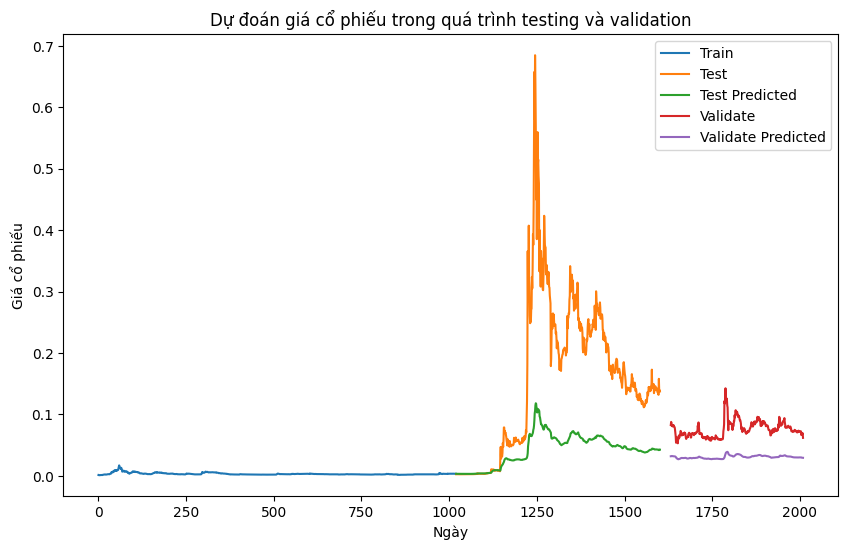

In [75]:
# Dự đoán giá của quá trình testing
X_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(X_test_pred)

# Dự đoán giá của quá trình validation
X_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(X_validate_pred)

# Hiển thị biểu đồ dự đoán giá của quá trình testing và validation
plt.figure(figsize=(10, 6))
train = prices[:train_size]
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(y_test)), scaler.inverse_transform(y_test), label='Test')
plt.plot(range(train_size, train_size + len(y_test)), y_test_pred, label='Test Predicted')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), scaler.inverse_transform(y_validate), label='Validate')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), y_validate_pred, label='Validate Predicted')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Dự đoán giá cổ phiếu trong quá trình testing và validation')
plt.legend()
plt.show()



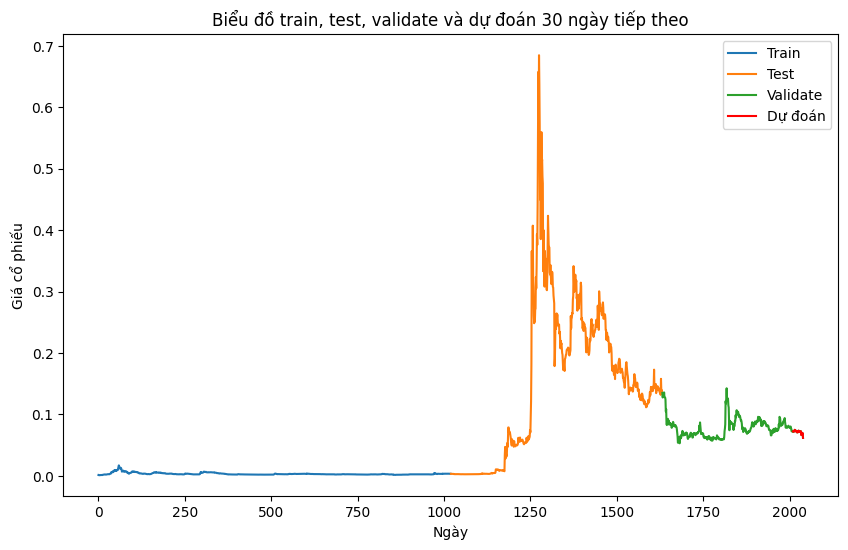

In [76]:
import matplotlib.pyplot as plt

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [77]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
2010    0.072459
2011    0.071777
2012    0.071986
2013    0.072046
2014    0.072729
2015    0.074911
2016    0.073546
2017    0.073527
2018    0.073670
2019    0.072142
2020    0.072998
2021    0.072864
2022    0.070735
2023    0.070875
2024    0.070984
2025    0.072683
2026    0.073613
2027    0.073185
2028    0.072361
2029    0.071660
2030    0.071492
2031    0.072612
2032    0.072671
2033    0.072471
2034    0.066573
2035    0.070373
2036    0.067300
2037    0.067966
2038    0.069489
2039    0.061860
Name: Close, dtype: float64


In [78]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

print("MAE (testing):", mae_test)
print("MAPE (testing):", mape_test)
print("RMSE (testing):", rmse_test)
print("MAE (validation):", mae_validate)
print("MAPE (validation):", mape_validate)
print("RMSE (validation):", rmse_validate)


12/12 [==============================] - 0s 4ms/step
MAE (testing): 0.11570422673562727
MAPE (testing): 0.5882330130253344
RMSE (testing): 0.15293088904506585
MAE (validation): 0.045405562696042165
MAPE (validation): 0.5899157030910699
RMSE (validation): 0.04680093525494525


#ETH-USD

##7:2:1

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [80]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/ETH-USD.csv')

In [81]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [82]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [83]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.2)
validate_size = len(scaled_prices) - train_size - test_size
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [84]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [85]:
# Tạo mô hình DNN
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/10
44/44 [==============================] - 2s 13ms/step - loss: 0.0168
Epoch 2/10
44/44 [==============================] - 1s 12ms/step - loss: 0.0016
Epoch 3/10
44/44 [==============================] - 1s 13ms/step - loss: 9.8893e-04
Epoch 4/10
44/44 [==============================] - 1s 12ms/step - loss: 9.0347e-04
Epoch 5/10
44/44 [==============================] - 1s 13ms/step - loss: 7.4696e-04
Epoch 6/10
44/44 [==============================] - 1s 12ms/step - loss: 7.3194e-04
Epoch 7/10
44/44 [==============================] - 1s 14ms/step - loss: 7.0050e-04
Epoch 8/10
44/44 [==============================] - 1s 16ms/step - loss: 6.1135e-04
Epoch 9/10
44/44 [==============================] - 1s 17ms/step - loss: 6.5512e-04
Epoch 10/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0015
Loss trên tập kiểm tra: 0.0014874690677970648


6/6 [==============================] - 0s 4ms/step


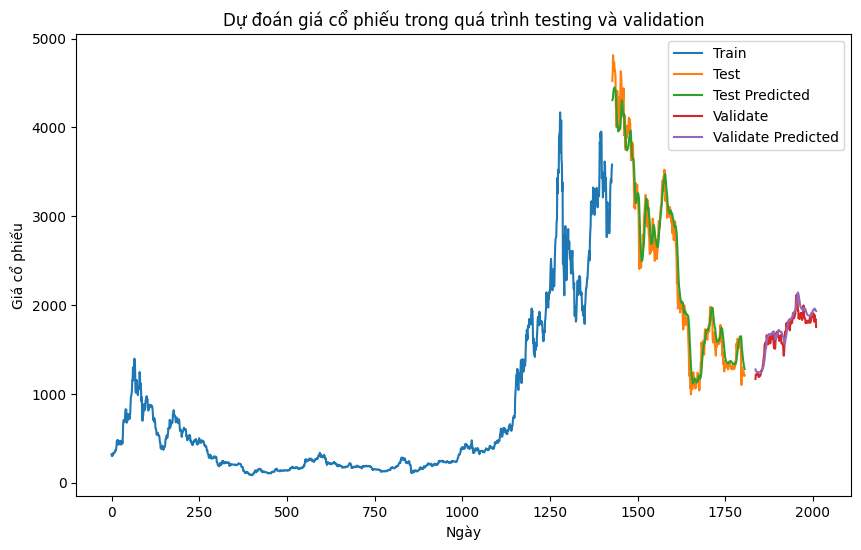

In [87]:
# Dự đoán giá của quá trình testing
X_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(X_test_pred)

# Dự đoán giá của quá trình validation
X_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(X_validate_pred)

# Hiển thị biểu đồ dự đoán giá của quá trình testing và validation
plt.figure(figsize=(10, 6))
train = prices[:train_size]
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(y_test)), scaler.inverse_transform(y_test), label='Test')
plt.plot(range(train_size, train_size + len(y_test)), y_test_pred, label='Test Predicted')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), scaler.inverse_transform(y_validate), label='Validate')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), y_validate_pred, label='Validate Predicted')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Dự đoán giá cổ phiếu trong quá trình testing và validation')
plt.legend()
plt.show()



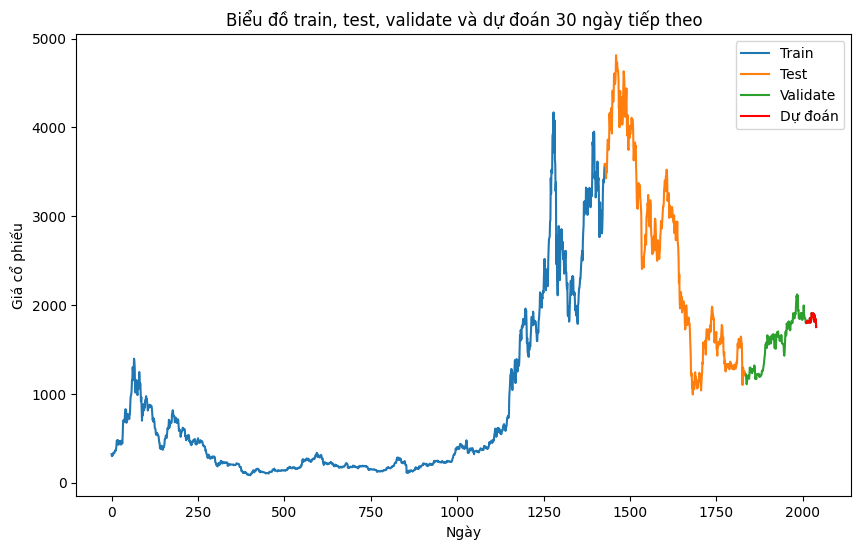

In [88]:
import matplotlib.pyplot as plt

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [89]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
2010    1808.019775
2011    1796.114868
2012    1800.500977
2013    1817.549927
2014    1824.121460
2015    1821.859619
2016    1801.728516
2017    1812.589478
2018    1820.478027
2019    1804.531372
2020    1817.534790
2021    1854.380615
2022    1800.099976
2023    1805.953735
2024    1828.689697
2025    1831.118286
2026    1910.914185
2027    1893.078125
2028    1901.026611
2029    1874.130493
2030    1862.201416
2031    1907.256592
2032    1892.412476
2033    1890.513550
2034    1811.828369
2035    1884.494873
2036    1832.395996
2037    1846.301880
2038    1840.225220
2039    1752.384766
Name: Close, dtype: float64


In [90]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

print("MAE (testing):", mae_test)
print("MAPE (testing):", mape_test)
print("RMSE (testing):", rmse_test)
print("MAE (validation):", mae_validate)
print("MAPE (validation):", mape_validate)
print("RMSE (validation):", rmse_validate)


6/6 [==============================] - 0s 4ms/step
MAE (testing): 141.1209831439629
MAPE (testing): 0.06589748964716051
RMSE (testing): 182.33966543170413
MAE (validation): 71.43510980715696
MAPE (validation): 0.04259256917526955
RMSE (validation): 86.70762165964148


##5:3:2

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [92]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/ETH-USD.csv')

In [93]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [94]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [95]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.5)
test_size = int(len(scaled_prices) * 0.3)
validate_size = len(scaled_prices) - train_size - test_size
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [96]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [97]:
# Tạo mô hình DNN
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [98]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/10
31/31 [==============================] - 1s 12ms/step - loss: 0.0020
Epoch 2/10
31/31 [==============================] - 0s 12ms/step - loss: 1.8387e-04
Epoch 3/10
31/31 [==============================] - 0s 14ms/step - loss: 1.3242e-04
Epoch 4/10
31/31 [==============================] - 0s 12ms/step - loss: 1.1798e-04
Epoch 5/10
31/31 [==============================] - 0s 13ms/step - loss: 1.1196e-04
Epoch 6/10
31/31 [==============================] - 0s 12ms/step - loss: 1.0319e-04
Epoch 7/10
31/31 [==============================] - 0s 12ms/step - loss: 9.8801e-05
Epoch 8/10
31/31 [==============================] - 0s 12ms/step - loss: 1.0080e-04
Epoch 9/10
31/31 [==============================] - 0s 12ms/step - loss: 8.8544e-05
Epoch 10/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0027
Loss trên tập kiểm tra: 0.0026632435619831085


12/12 [==============================] - 0s 4ms/step


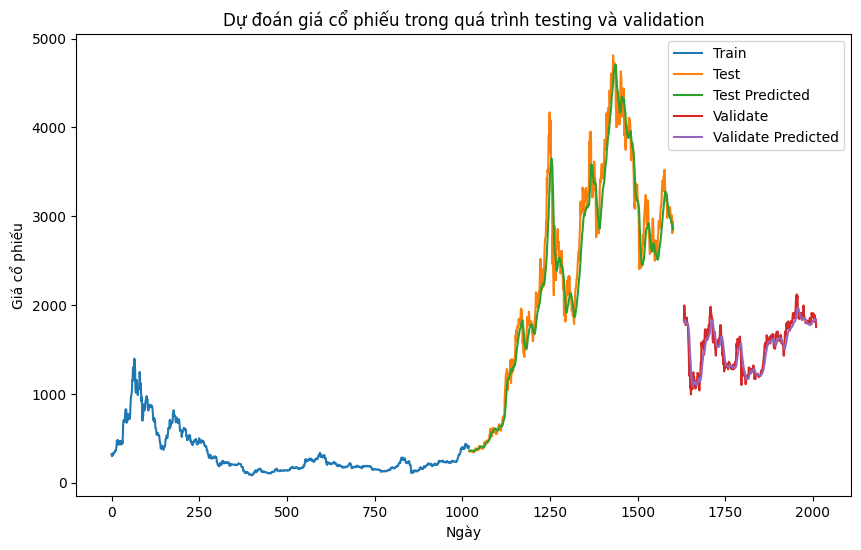

In [99]:
# Dự đoán giá của quá trình testing
X_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(X_test_pred)

# Dự đoán giá của quá trình validation
X_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(X_validate_pred)

# Hiển thị biểu đồ dự đoán giá của quá trình testing và validation
plt.figure(figsize=(10, 6))
train = prices[:train_size]
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(y_test)), scaler.inverse_transform(y_test), label='Test')
plt.plot(range(train_size, train_size + len(y_test)), y_test_pred, label='Test Predicted')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), scaler.inverse_transform(y_validate), label='Validate')
plt.plot(range(train_size + test_size, train_size + test_size + len(y_validate)), y_validate_pred, label='Validate Predicted')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Dự đoán giá cổ phiếu trong quá trình testing và validation')
plt.legend()
plt.show()



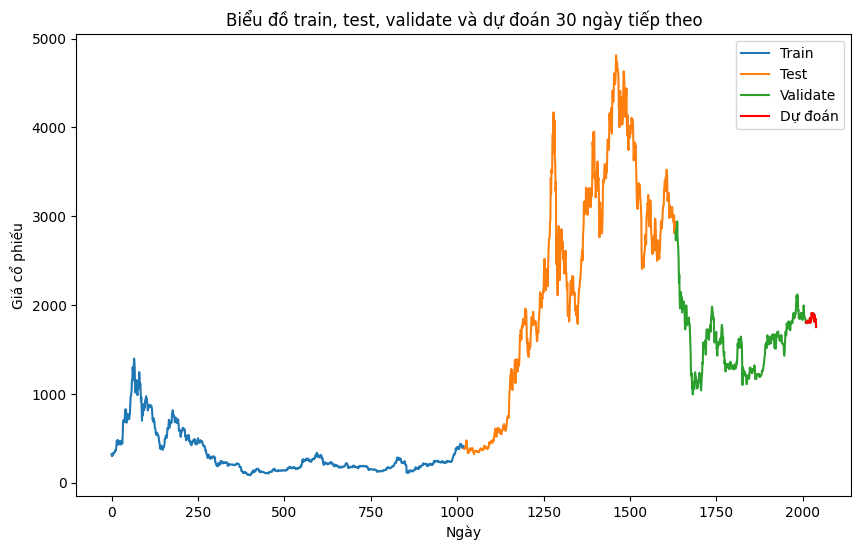

In [100]:
import matplotlib.pyplot as plt

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [101]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
2010    1808.019775
2011    1796.114868
2012    1800.500977
2013    1817.549927
2014    1824.121460
2015    1821.859619
2016    1801.728516
2017    1812.589478
2018    1820.478027
2019    1804.531372
2020    1817.534790
2021    1854.380615
2022    1800.099976
2023    1805.953735
2024    1828.689697
2025    1831.118286
2026    1910.914185
2027    1893.078125
2028    1901.026611
2029    1874.130493
2030    1862.201416
2031    1907.256592
2032    1892.412476
2033    1890.513550
2034    1811.828369
2035    1884.494873
2036    1832.395996
2037    1846.301880
2038    1840.225220
2039    1752.384766
Name: Close, dtype: float64


In [102]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

print("MAE (testing):", mae_test)
print("MAPE (testing):", mape_test)
print("RMSE (testing):", rmse_test)
print("MAE (validation):", mae_validate)
print("MAPE (validation):", mape_validate)
print("RMSE (validation):", rmse_validate)


12/12 [==============================] - 0s 4ms/step
MAE (testing): 173.37864255085844
MAPE (testing): 0.06951618818649467
RMSE (testing): 243.9847337015661
MAE (validation): 74.84606917446882
MAPE (validation): 0.04995239865226343
RMSE (validation): 104.31350819499184
